In [1]:
%env DB_NAME = pgequity
%env  DB_USER = pgequity
%env DB_PASSWORD = pgequity
%env DB_HOST = localhost
%env DB_PORT = 5432

env: DB_NAME=pgequity
env: DB_USER=pgequity
env: DB_PASSWORD=pgequity
env: DB_HOST=localhost
env: DB_PORT=5432


                                 PDIFF(C(IBM),-1)  PDIFF(C(IBM),1)  \
PDIFF(C(IBM),-1)                         1.000160         0.038817   
PDIFF(C(IBM),1)                          0.038817         1.000160   
RENTROPY(C(IBM),10)                      0.007809         0.014937   
RENTROPY(C(IBM),20)                      0.009204        -0.007529   
RENTROPY(C(IBM),50)                      0.008715        -0.017016   
STOCH_OSC(IBM,10)                        0.008029         0.447357   
STOCH_OSC(IBM,20)                       -0.003088         0.347838   
STOCH_OSC(IBM,50)                        0.003190         0.232473   
RAVG(C(IBM),10)/RAVG(C(IBM),20)         -0.010744         0.041186   
RAVG(C(IBM),20)/RAVG(C(IBM),50)          0.035177        -0.029270   

                                 RENTROPY(C(IBM),10)  RENTROPY(C(IBM),20)  \
PDIFF(C(IBM),-1)                            0.007809             0.009204   
PDIFF(C(IBM),1)                             0.014937            -0.007529  

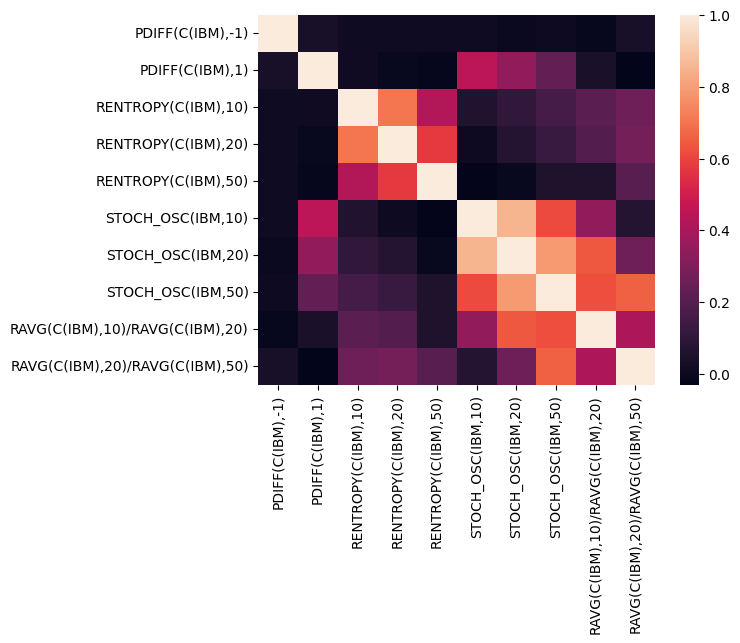

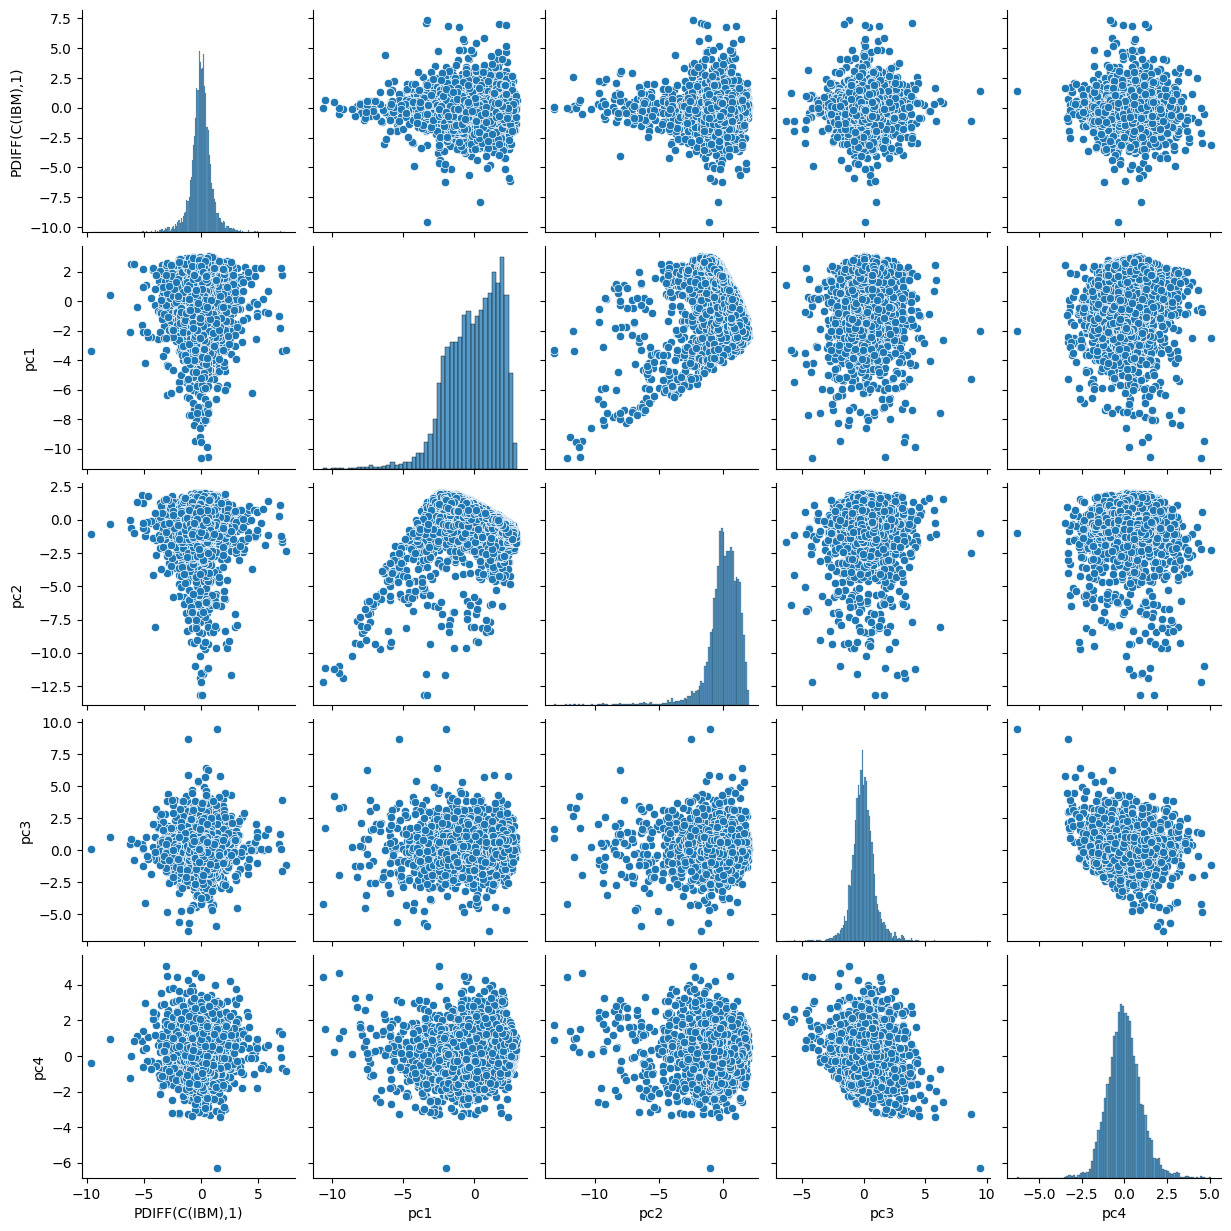

In [2]:
# from pynoahdb.series import Series
from pyfunc.processor import Processor

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import pandas as pd

from sklearn.decomposition import PCA



entries = [
    'PDIFF(C(IBM),-1)',
    'PDIFF(C(IBM),1)',
    'RENTROPY(C(IBM),10)',
    'RENTROPY(C(IBM),20)',
    'RENTROPY(C(IBM),50)',
    'STOCH_OSC(IBM,10)',
    'STOCH_OSC(IBM,20)',
    'STOCH_OSC(IBM,50)',
    'RAVG(C(IBM),10)/RAVG(C(IBM),20)',
    'RAVG(C(IBM),20)/RAVG(C(IBM),50)',
]

df = Processor().process('|'.join(entries))


#normalize the data using sklearn
scaler = StandardScaler()
df = scaler.fit_transform(df)

df = pd.DataFrame(df, columns=entries)

dfFeatures = df.drop('PDIFF(C(IBM),1)', axis=1)
dfFeatures.dropna(inplace=True)

dfTarget = df['PDIFF(C(IBM),1)']

#calculate covariance matrix
covMatrix = pd.DataFrame(data = df).cov()
print(covMatrix)
sns.heatmap(covMatrix, fmt='g')


pca = PCA(n_components=4)

principalComponents = pca.fit_transform(dfFeatures)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3', 'pc4'])

finalDf = pd.concat([df[['PDIFF(C(IBM),1)']],principalDf], axis = 1)
finalDf.dropna(inplace=True)

finalDf.head()

df.dropna(inplace=True)

sns.pairplot(finalDf)

#run a linear regression
from sklearn.linear_model import LinearRegression

X = finalDf[['pc1', 'pc2', 'pc3', 'pc4']]
y = finalDf['PDIFF(C(IBM),1)']

lm = LinearRegression()
lm.fit(X,y)

print(lm.intercept_)
print(lm.coef_)
print(lm.score(X,y))




        C(IBM)  EWMCOM(C(IBM),1)  EWMCOM(C(IBM),10)  EWMCOM(C(IBM),100)  \
6145  2.272522          2.255147           2.332989            2.446877   
6146  2.323837          2.291633           2.336246            2.448761   
6147  2.334327          2.315129           2.340175            2.450742   
6148  2.304276          2.311828           2.340971            2.452374   
6149  2.295203          2.305635           2.340857            2.453891   

      index_date  
6145  2024-06-06  
6146  2024-06-07  
6147  2024-06-10  
6148  2024-06-11  
6149  2024-06-12  


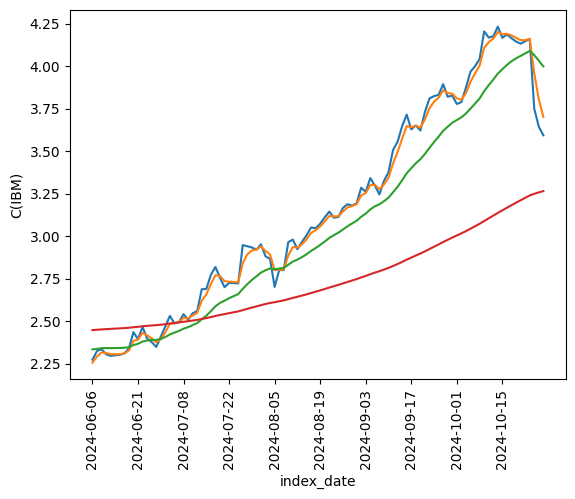

In [3]:
# entries = [
#     'PDIFF(C(IBM),-5)',
#     'RSI(C(IBM),10)',
#     'RSI(C(IBM),20)',
#     'RSI(C(IBM),50)',
# ]

entries = [
    'C(IBM)',
    'EWMCOM(C(IBM),1)',
    'EWMCOM(C(IBM),10)',
    'EWMCOM(C(IBM),100)',
]


dfO = Processor().process('|'.join(entries))

#normalize the data using sklearn
scaler = StandardScaler()
df = scaler.fit_transform(dfO)

df = pd.DataFrame(df, columns=entries)

#add the index_date column from the first column of the original dataframe
df['index_date'] = dfO.index


#trim to last 100 rows
df = df[-100:]

print(df.head())

#show the x-axis labels vertically
plt.xticks(rotation=90)

#show only every 10th x-axis label
plt.xticks(range(0, len(df['index_date']), 10))



sns.lineplot(data=df, x='index_date', y='C(IBM)')
sns.lineplot(data=df, x='index_date', y='EWMCOM(C(IBM),1)')
sns.lineplot(data=df, x='index_date', y='EWMCOM(C(IBM),10)')
sns.lineplot(data=df, x='index_date', y='EWMCOM(C(IBM),100)')
# sns.lineplot(data=df, x='index_date', y='RSI(C(IBM),50)')
plt.show()

In [ ]:
from pyfunc.functiongenerator import FunctionGenerator

gen = FunctionGenerator()


for i in range(1, 100):
    try:
        feature_list = gen.generate_stock_function_string(20)


        df = Processor().process(feature_list)

        print(df.shape)

        df.dropna(inplace=True, axis=0)

        print(df.shape)


        #get the index_date column
        df_index_date = df.index

        #parse the feature list by pipe into a array of strings
        feature_list = feature_list.split('|')      

        scaler = StandardScaler()
        df = scaler.fit_transform(df)

        df = pd.DataFrame(df, columns=feature_list)

        #add the index_date column from the first column of the original dataframe
        df['index_date'] = df_index_date


        #drop na values
        df.dropna(inplace=True)

        print(df.head())

    except:
        continue


        #PCA analysis
    pca = PCA(n_components=10)

    principalComponents = pca.fit_transform(df)

    principalDf = pd.DataFrame(data = principalComponents)

    finalDf = pd.concat([df[['index_date']],principalDf], axis = 1)

    finalDf.dropna(inplace=True)

    #show the variance explained by each component
    print(pca.explained_variance_ratio_)
    print(pca.singular_values_)
    # except:
    #     continue


# for i in range(1, 100):
#     feature_list = gen.generate_stock_function_string(1)
#     print(feature_list)
#     try:
#         df = Processor().process(feature_list)
#         #plot the data
#         plt.xticks(rotation=90)
#         plt.xticks(range(0, len(df), len(df) // 10))
#         sns.lineplot(data=df, x='index_date', y=df.columns[0])
#         plt.show()
#     except:
#         print('error')
#         continue



(6245, 20)
(6245, 2)
(6245, 20)
(6245, 3)
(6245, 20)
(6245, 1)
(6245, 20)
(6245, 0)
(6245, 20)
(6245, 3)
(6245, 20)
(6245, 3)
(6245, 20)
(6245, 2)
(6245, 20)
(6245, 1)
(6245, 20)
(6245, 7)
(6245, 20)
(6245, 1)
(6245, 20)
(6245, 2)
(6245, 20)
(6245, 0)
(6245, 20)
(6245, 0)
(6245, 20)
(6245, 1)
(6245, 20)
(6245, 0)
(6245, 20)
(6245, 2)
(6245, 20)
(6245, 3)
(6245, 20)
(6245, 4)
(6245, 20)
(6245, 3)
(6245, 20)
(6245, 2)
(6245, 20)
(6245, 4)
(6245, 20)
(6245, 2)
(6245, 20)
(6245, 1)
(6245, 20)
(6245, 2)
(6245, 20)
(6245, 1)
(6245, 20)
(6245, 1)
(6245, 20)
(6245, 0)
(6245, 20)
(6245, 2)
